Created by: Emmanuel Castillo [ecastillot@unal.edu.co]

Running in Google Collab... 

# Montaje del disco Drive


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


Ahora vamos a descargar el repositorio, para tener acceso a la carpeta dataset. 

**Si ya lo descargamos omitamos esta linea.**

In [ ]:
# ! git clone https://github.com/ecastillot/Seismology_IA.git /content/drive/MyDrive/Seismology_IA

Cloning into '/content/drive/MyDrive/Seismology_IA'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 26 (delta 5), reused 24 (delta 3), pack-reused 0
Unpacking objects: 100% (26/26), done.


Comprobamos que si haya descargado

In [ ]:
# ! ls -la /content/drive/MyDrive/Seismology_IA

total 1040
-rw------- 1 root root 526213 Apr 14 23:01 AI2class.ipynb
-rw------- 1 root root 525368 Apr 14 23:01 AI.ipynb
drwx------ 2 root root   4096 Apr 14 23:01 dataset
drwx------ 8 root root   4096 Apr 14 23:01 .git
drwx------ 2 root root   4096 Apr 14 23:01 .ipynb_checkpoints


Debe verse una carpeta llamada dataset.

# Introducción al Machine Learning

1. Carga de datos
2. Regresión logística (perceptrón)
3. Red Neuronal (perceptrón multicapa)
4. Red Neuronal Convolucional


## 1. Carga de datos

Referencia: https://github.com/martijnende/ICTP_EQ_tutorials/blob/master/ML/3_event_detection_answers.ipynb

In [3]:
# # Import the libraries
# import tensorflow as tf
# from tensorflow import keras
# from sklearn.metrics import confusion_matrix
# import itertools
# import numpy as np
# import matplotlib.pyplot as plt
# import os
# import gzip
# import pickle

# def load_data(dataset_folder):
#     with gzip.GzipFile(f"{dataset_folder}/AE_data.tar.gz", "r") as f:
#         data = pickle.load(f)
#     return data["train_data"], data["train_labels"], data["test_data"], data["test_labels"]

# dataset_folder = "/content/drive/MyDrive/Seismology_IA/dataset"
# # Load the dataset
# train_signals, train_labels, test_signals, test_labels = load_data(dataset_folder)
# classes = {'1':"earthquake",'0':"noise"}

### Exploración de datos

In [ ]:
# m_train = train_signals.shape[0]
# m_test = test_signals.shape[0]

# print ("Number of training examples: " + str(m_train))
# print ("Number of testing examples: " + str(m_test))
# print ("train_signals shape: " + str(train_signals.shape))
# print ("train_labels shape: " + str(train_labels.shape))
# print ("test_signals shape: " + str(test_signals.shape))
# print ("test_labels shape: " + str(test_labels.shape))

Number of training examples: 1440
Number of testing examples: 360
train_signals shape: (1440, 1024)
train_labels shape: (1440,)
test_signals shape: (360, 1024)
test_labels shape: (360,)


y = 1 --> earthquake


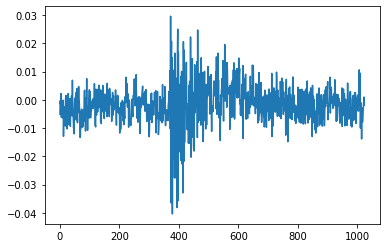

In [ ]:
# index = 37
# plt.plot(train_signals[index,:])
# print ("y = " + str(train_labels[index]) + " --> " + classes[str(train_labels[index] )])

## 2. Una neurona-Perceptrón

<p align="center"><img src="https://drive.google.com/uc?id=1IAGokghb1uFh8WK04i4tZWMbExlEb7cH" title="reshape2vector" width="500" align="center" /></p> 

In [ ]:
# def detection_model(x_train,y_train,epochs):
#     """
#     Crea un modelo perceptrón

#     Parametros
#     ----------
#     x_train: arreglo de numpy
#       datos de entrenamiento (señal)
#     y_train: arreglo de numpy
#       Etiquetas de los datos de entrenamiento

#     Resultado
#     ---------
#     model: Modelo de Tensorflow
#       Modelo desarrollado para detectar sismos
#     """
#     model = tf.keras.Sequential()
#     model.add( tf.keras.layers.Dense(units=1,activation=tf.nn.sigmoid,input_shape=x_train[0].shape) )
#     model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
#     model.fit(x_train,y_train,epochs=epochs)
#     return model

# mymodel = detection_model(x_train=train_signals,y_train=train_labels,epochs=100)
# mymodel.summary()

Epoch 1/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4980
Epoch 2/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5515
Epoch 3/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5553
Epoch 4/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5691
Epoch 5/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.5684
Epoch 6/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5843
Epoch 7/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5615
Epoch 8/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6879 - accuracy: 0.5591
Epoch 9/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5685
Epoch 10/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.5901
Epoch 11/

Veamos que predice nuestro modelo evaluandolo en nuestros datos de predicción.

In [ ]:
# test_loss, test_acc = mymodel.evaluate(test_signals, test_labels)
# print("Test accuracy: %.4f" % test_acc)

12/12 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.5389
Test accuracy: 0.5389


In [ ]:
# predictions = mymodel.predict(test_signals)
# rounded_predictions = np.round(predictions).astype(int)

Reality: y = 0 --> noise
Prediction: y = 0 --> . Your single model prediction: noise


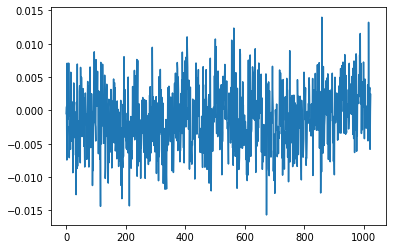

In [ ]:
# index = 40
# plt.plot(test_signals[index,:])
# print ("Reality: y = " + str(test_labels[index]) +\
#     " --> " + classes[str(test_labels[index] )])
# print ("Prediction: y = " + str(rounded_predictions[index][0]) +\
#     " --> . Your single model prediction: " + classes[str(rounded_predictions[index][0] )])

para evaluar de manera general nuestro modelo hacemos lo siguiente:

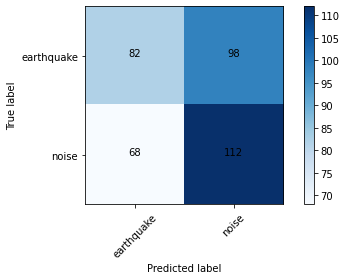

In [ ]:
# cm = confusion_matrix(y_true= test_labels, y_pred = np.squeeze(rounded_predictions))
# plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
# plt.colorbar()
# tick_marcks = np.arange((len(list(classes.values()))))
# plt.xticks(tick_marcks,list(classes.values()),rotation=45)
# plt.yticks(tick_marcks,list(classes.values()))

# thresh = cm.max()/2
# for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
#   plt.text(j,i,cm[i,j],horizontalalignment="center",
#            color="black")
  
#   plt.tight_layout()
#   plt.ylabel('True label')
#   plt.xlabel('Predicted label')

## 3. Red Neuronal densa

<p align="center"><img src="https://drive.google.com/uc?id=1ICjdnHl8Dk8Q3YzUZK6s4VZhBpZX9SDq" title="reshape2vector" width="500" align="center" /></p> 

In [4]:
# def NN_detection_model(x_train,y_train,epochs):
#     """
#     Crea un modelo RED NEURONAL DENSA

#     Parametros
#         ----------
#         x_train: arreglo de numpy
#           datos de entrenamiento (señal)
#         y_train: arreglo de numpy
#           Etiquetas de los datos de entrenamiento

#         Resultado
#         ---------
#         model: Modelo de Tensorflow
#           Modelo desarrollado para detectar sismos
#     """
#     model = tf.keras.Sequential()
#     model.add( tf.keras.layers.Dense(units=4,activation=tf.nn.relu,input_shape=x_train[0].shape) )
#     model.add(tf.keras.layers.Dropout(0.4))
#     model.add( tf.keras.layers.Dense(units=3,activation=tf.nn.relu) )
#     model.add( tf.keras.layers.Dense(units=1,activation=tf.nn.sigmoid) )
#     model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
#     model.fit(x_train,y_train,epochs=epochs)
#     return model

# NNmodel = NN_detection_model(x_train=train_signals,y_train=train_labels,epochs=100)
# NNmodel.summary()

Epoch 1/100
45/45 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5145
Epoch 2/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5037
Epoch 3/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5260
Epoch 4/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5219
Epoch 5/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5473
Epoch 6/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5707
Epoch 7/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5366
Epoch 8/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5568
Epoch 9/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5639
Epoch 10/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.6070
Epoch 11/

Veamos que predice nuestro modelo evaluandolo en nuestros datos de predicción.

In [5]:
# test_loss, test_acc = NNmodel.evaluate(test_signals, test_labels)
# print("Test accuracy: %.4f" % test_acc)

12/12 [==============================] - 0s 2ms/step - loss: 0.9123 - accuracy: 0.5194
Test accuracy: 0.5194


In [6]:
# NNpredictions = NNmodel.predict(test_signals)
# NNrounded_predictions = np.round(NNpredictions).astype(int)

Reality: y = 1 --> earthquake
Prediction: y = 0 --> . Your single model prediction: noise


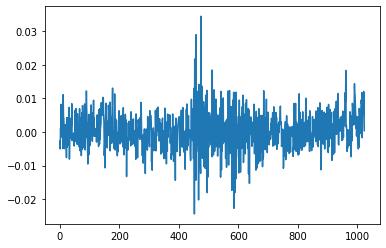

In [7]:
# index = 20
# plt.plot(test_signals[index,:])
# print ("Reality: y = " + str(test_labels[index]) +\
#     " --> " + classes[str(test_labels[index] )])
# print ("Prediction: y = " + str(NNrounded_predictions[index][0]) +\
#     " --> . Your single model prediction: " + classes[str(NNrounded_predictions[index][0] )])

para evaluar de manera general nuestro modelo hacemos lo siguiente:

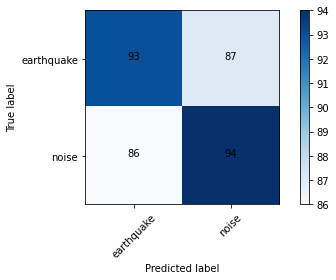

In [8]:
# cm = confusion_matrix(y_true= test_labels, y_pred = np.squeeze(NNrounded_predictions))
# plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
# plt.colorbar()
# tick_marcks = np.arange((len(list(classes.values()))))
# plt.xticks(tick_marcks,list(classes.values()),rotation=45)
# plt.yticks(tick_marcks,list(classes.values()))

# thresh = cm.max()/2
# for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
#   plt.text(j,i,cm[i,j],horizontalalignment="center",
#            color="black")
  
#   plt.tight_layout()
#   plt.ylabel('True label')
#   plt.xlabel('Predicted label')

## 4. Convolutional Neural Network (CNN)
<p align="center"><img src="https://drive.google.com/uc?id=1ETJv6XkzA-CVNvA9SJEDZGSjBboF6jY7" title="cnn" width="500" align="center" /></p> 


In [ ]:
# def CNN_detection_model(x_train,y_train,epochs):
#     """
#     Crea unA RED NEURONAL Convolucional

#     Parametros
#     ----------
#     x_train: arreglo de numpy
#       datos de entrenamiento (señal)
#     y_train: arreglo de numpy
#       Etiquetas de los datos de entrenamiento

#     Resultado
#     ---------
#     model: Modelo de Tensorflow
#       Modelo desarrollado para detectar sismos
#     """
    

#     # Keras default initialiser = glorot_uniform
#     # A better initialiser for ReLU activations = he_normal
#     initializer = "he_normal"
#     # initializer = "glorot_uniform"

#     model = keras.Sequential([
#         keras.layers.Conv1D(16, kernel_size=5, activation=tf.nn.relu, padding="same", kernel_initializer=initializer, input_shape=x_train[0].shape),
#         keras.layers.Conv1D(16, kernel_size=5, activation=tf.nn.relu, padding="same", kernel_initializer=initializer),
#         keras.layers.MaxPooling1D(),
#         keras.layers.Conv1D(16, kernel_size=5, activation=tf.nn.relu, padding="same", kernel_initializer=initializer),
#         keras.layers.Conv1D(16, kernel_size=5, activation=tf.nn.relu, padding="same", kernel_initializer=initializer),
#         keras.layers.MaxPooling1D(),
#         keras.layers.Conv1D(16, kernel_size=5, activation=tf.nn.relu, padding="same", kernel_initializer=initializer),
#         keras.layers.Conv1D(16, kernel_size=5, activation=tf.nn.relu, padding="same", kernel_initializer=initializer),
#         keras.layers.MaxPooling1D(),
#         keras.layers.Flatten(),
#         keras.layers.Dense(16, activation=tf.nn.relu, kernel_initializer=initializer),
#         keras.layers.Dense(1, activation=tf.nn.sigmoid, kernel_initializer="glorot_normal")
#     ])
#     # Compile and print a summary
#     model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
#     model.fit(
#         x_train, 
#         y_train, 
#         verbose=1,
#         epochs=10)
#     return model


# # For convolutional layers, an additional dimension needs to be added
# rs_train_signals = np.expand_dims(train_signals, 2)
# rs_test_signals = np.expand_dims(test_signals, 2)
# CNNmodel = CNN_detection_model(x_train=rs_train_signals,y_train=train_labels,epochs=100)

Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_24 (Conv1D)           (None, 1024, 16)          96        
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 1024, 16)          1296      
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 512, 16)           0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 512, 16)           1296      
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 512, 16)           1296      
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 256, 16)           0         
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 256, 16)         

Evaluemos nuestro modelo en lso datos de testeo.

In [ ]:
# test_loss, test_acc = CNNmodel.evaluate(rs_test_signals, test_labels)
# print("Test accuracy: %.4f" % test_acc)

12/12 [==============================] - 0s 20ms/step - loss: 0.4752 - accuracy: 0.8389
Test accuracy: 0.8389


In [ ]:
# CNNpredictions = CNNmodel.predict(rs_test_signals)
# CNNrounded_predictions = np.round(CNNpredictions).astype(int)

Reality: y = 1 --> earthquake
Prediction: y = 1 --> . Your single model prediction: earthquake


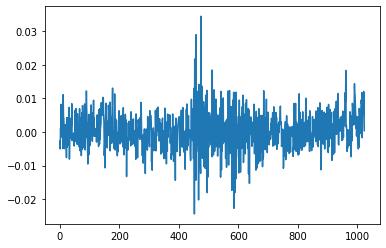

In [ ]:
# index = 20
# plt.plot(test_signals[index,:])
# print ("Reality: y = " + str(test_labels[index]) +\
#     " --> " + classes[str(test_labels[index] )])
# print ("Prediction: y = " + str(CNNrounded_predictions[index][0]) +\
#     " --> . Your single model prediction: " + classes[str(CNNrounded_predictions[index][0] )])

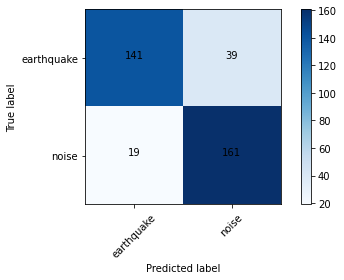

In [ ]:
# cm = confusion_matrix(y_true= test_labels, y_pred = np.squeeze(CNNrounded_predictions))
# plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
# plt.colorbar()
# tick_marcks = np.arange((len(list(classes.values()))))
# plt.xticks(tick_marcks,list(classes.values()),rotation=45)
# plt.yticks(tick_marcks,list(classes.values()))

# thresh = cm.max()/2
# for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
#   plt.text(j,i,cm[i,j],horizontalalignment="center",
#            color="black")
  
#   plt.tight_layout()
#   plt.ylabel('True label')
#   plt.xlabel('Predicted label')

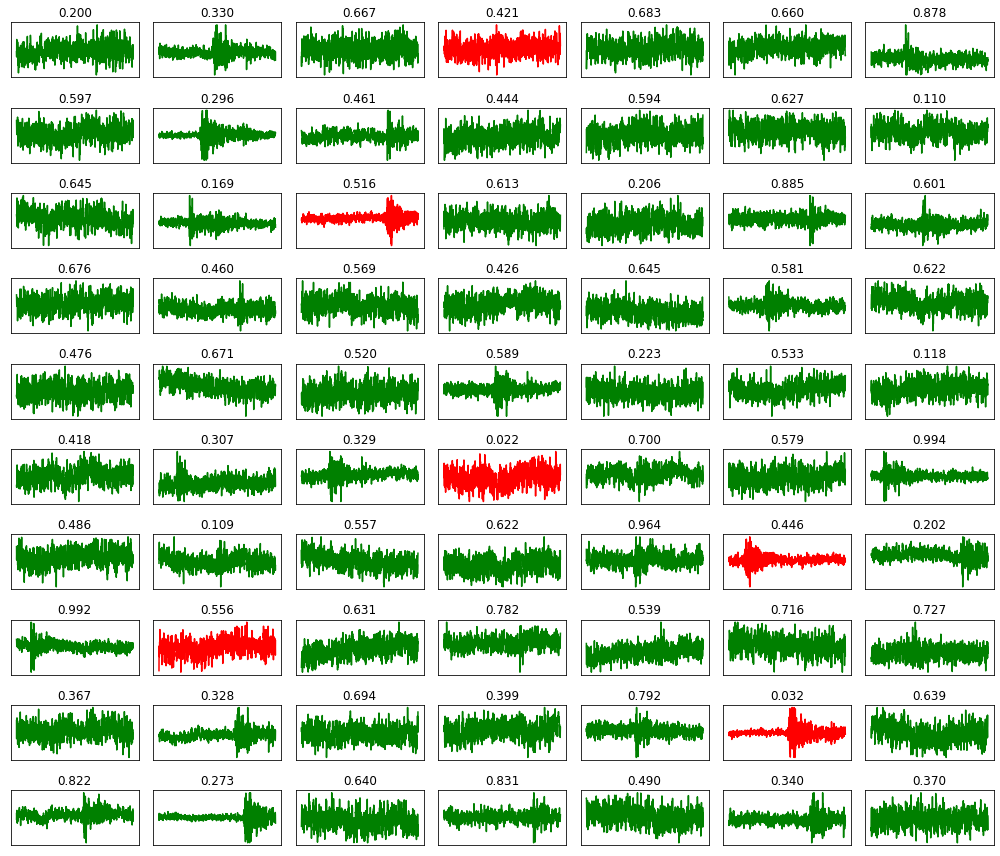

In [ ]:
# CNNpredictions = CNNmodel.predict(rs_test_signals)
# confidence = 2 * np.abs(CNNpredictions - 0.5)
# CNNpredictions = np.round(CNNpredictions).astype(int)


# fig = plt.figure(figsize=(14, 12))

# # Plot 70 examples of events and noise
# for i in range(10):
#     for j in range(7):
#         n = 7*i + j
#         # Events
#         plt.subplot(10, 7, 1+n)
#         if CNNpredictions[n] == test_labels[n]:
#             colour = "g"
#         else:
#             colour = "r"
#         plt.plot(test_signals[n], c=colour)
#         plt.xticks([])
#         plt.yticks([])
#         plt.title("%.3f" % confidence[n])

# plt.tight_layout()
# plt.show()